In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
class UnivariateLinearRegression:
    def __init__(self, learning_rate=0.0001):
        self.lr = learning_rate
        self.theta_0 = None
        self.theta_1 = None

    def train(self, X, y):

        self.theta_1 = 0
        self.theta_0 = 0

        convergence_threshold = 1e-4
        change = np.inf
        prev_mse = np.inf
        max_iter = 10000
        iter_count = 0

        while change > convergence_threshold and iter_count < max_iter:
            y_pred = X * self.theta_1 + self.theta_0
            d_theta_1 = np.mean((y_pred - y) * X)
            d_theta_0 = np.mean(y_pred - y)

            prev_theta_0 = self.theta_0
            prev_theta_1 = self.theta_1

            self.theta_0 = self.theta_0 - (self.lr * d_theta_0)
            self.theta_1 = self.theta_1 - (self.lr * d_theta_1)

            change = np.sqrt((self.theta_0 - prev_theta_0) ** 2 + (self.theta_1 - prev_theta_1) ** 2)

            # Early stopping based on mean squared error
            mse = np.mean((y_pred - y) ** 2)
            if mse > prev_mse:
                break

            prev_mse = mse
            iter_count += 1

    def predict(self, X):
        y_pred = X * self.theta_1 + self.theta_0
        return y_pred

Mean squared error: 9.484464272032893


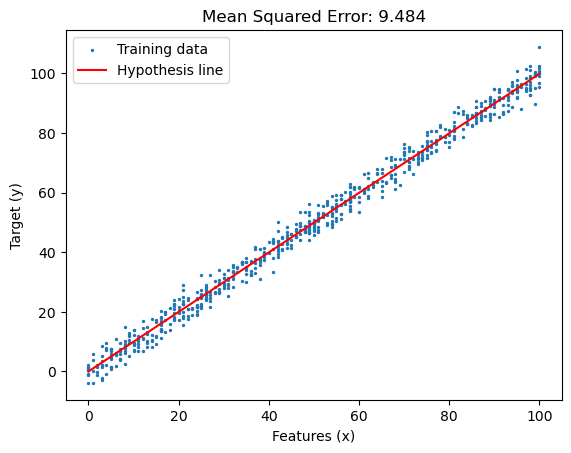

In [4]:
import matplotlib.pyplot as plt


def load_data(train_file, test_file):
    train_df = pd.read_csv("C:/Users/Admin/Documents/054/LInear Regression/train.csv")
    test_df = pd.read_csv("C:/Users/Admin/Documents/054/LInear Regression/test.csv")
    return train_df, test_df


def mean_squared_error(test_y, predictions):
    return np.mean((test_y - predictions) ** 2)


def plot_data_and_predictions(train_df, reg, mse):
    plt.scatter(train_df['x'], train_df['y'], s=2, label='Training data')
    x_line = np.linspace(np.min(train_df['x']), 100, 500)
    y_line = reg.predict(x_line)
    plt.plot(x_line, y_line, color='red', label='Hypothesis line')
    plt.xlabel("Features (x)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.title(f"Mean Squared Error: {mse:.3f}")
    plt.show()


def main():
    train_df, test_df = load_data('/kaggle/input/random-linear-regression/train.csv',
                                  '/kaggle/input/random-linear-regression/test.csv')
    reg = UnivariateLinearRegression(0.00005)
    reg.train(train_df['x'], train_df['y'])
    predictions = reg.predict(test_df['x'])

    mse = mean_squared_error(test_df['y'], predictions)
    print('Mean squared error:', mse)

    plot_data_and_predictions(train_df, reg, mse)


if __name__ == "__main__":
    main()